In [39]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).



# **Image Morphological Operations**

# Erosion

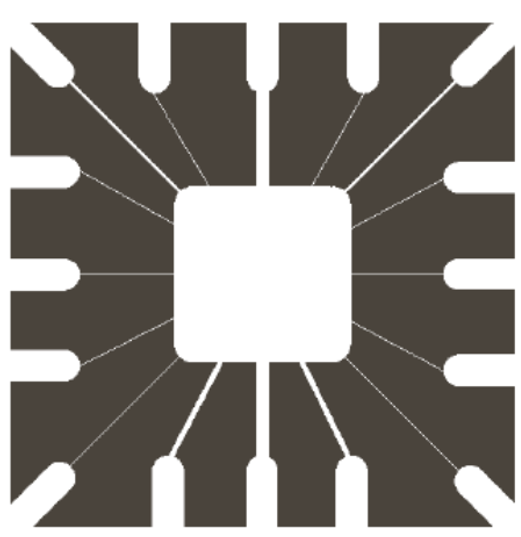

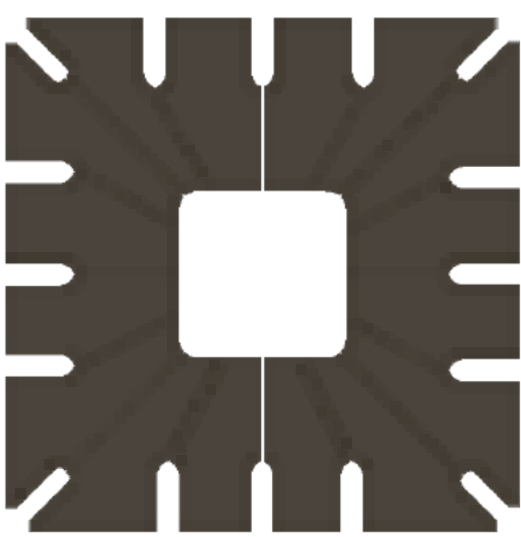

In [40]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def perform_erosion(binary_image, structuring_element):
    # Create a structuring element using numpy array
    kernel = np.array(structuring_element, dtype=np.uint8)

    # Perform erosion using OpenCV's erode function
    result_image = cv2.erode(binary_image, kernel, iterations=1)

    return result_image
    # Load a binary image (0 for background, 255 for foreground)
image_path = "/content/drive/MyDrive/Images/Erosion_pic.png"
binary_image = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)

    # Define a structuring element (example: a 11x11 square kernel)
structuring_element = np.ones((11, 11), dtype=np.uint8)

    # Perform erosion
eroded_image = perform_erosion(binary_image, structuring_element)

    # Display the original and eroded images
cv2_imshow(binary_image)
cv2_imshow(eroded_image)


#Dilation

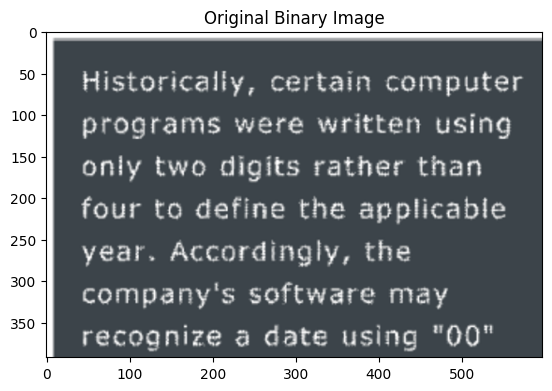

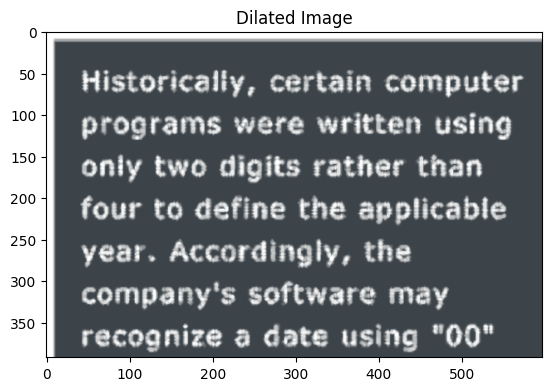

In [41]:
from matplotlib import pyplot as plt

def perform_dilation(binary_image, structuring_element):
    # Create a structuring element using numpy array
    kernel = np.array(structuring_element, dtype=np.uint8)

    # Perform dilation using OpenCV's dilate function
    result_image = cv2.dilate(binary_image, kernel, iterations=1)

    return result_image

image_path = "/content/drive/MyDrive/Images/Dilation_pic.png"
binary_image = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)

    # Define a structuring element (example: a 11x11 square kernel)
structuring_element = np.array([[0,1,0],[1,1,1],[0,1,0]], dtype=np.uint8)

# Display the original binary image using matplotlib
plt.imshow(binary_image, cmap='gray')
plt.title('Original Binary Image')
plt.show()

# Perform dilation
dilated_image = perform_dilation(binary_image, structuring_element)

# Display the dilated image using matplotlib
plt.imshow(dilated_image, cmap='gray')
plt.title('Dilated Image')
plt.show()


#Opening

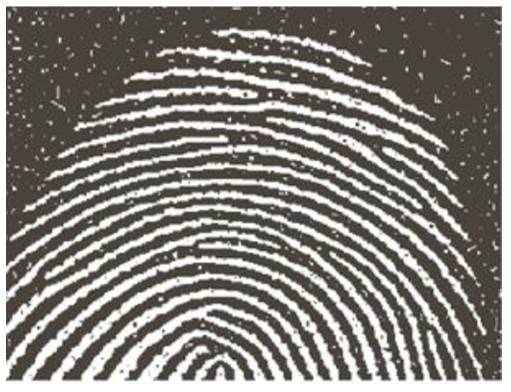

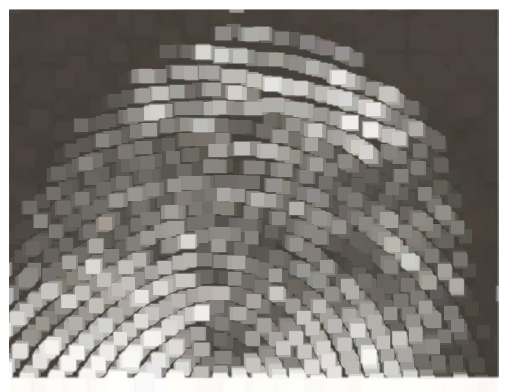

In [42]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def perform_opening(binary_image, structuring_element):
    # Create a structuring element using numpy array
    kernel = np.array(structuring_element, dtype=np.uint8)

    # Perform erosion followed by dilation using OpenCV's morphologyEx function
    result_image = cv2.morphologyEx(binary_image, cv2.MORPH_OPEN, kernel)

    return result_image

image_path = "/content/drive/MyDrive/Images/OC_pic.png"
binary_image = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)

    # Define a structuring element (example: a 11x11 square kernel)
structuring_element = np.ones((7,7), dtype=np.uint8)

# Perform opening
opened_image = perform_opening(binary_image, structuring_element)
final_image= perform_dilation(opened_image,structuring_element)

cv2_imshow(binary_image)
cv2_imshow(final_image)



#Closing

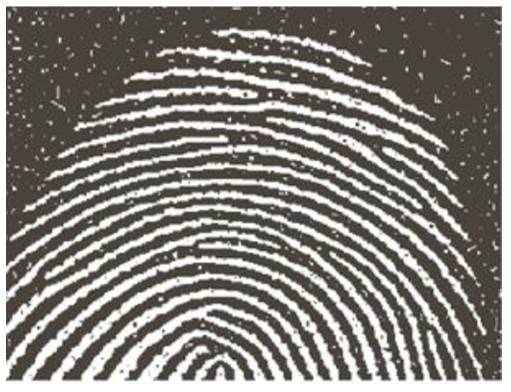

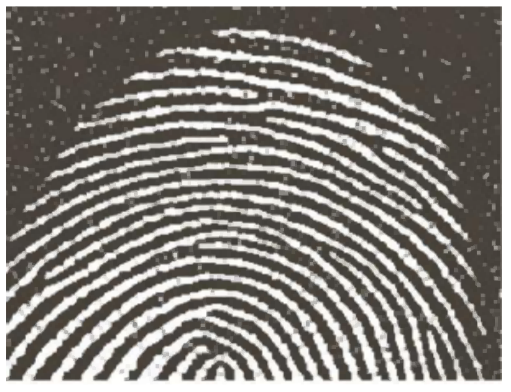

In [31]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def perform_closing(binary_image, structuring_element):
    # Create a structuring element using numpy array
    kernel = np.array(structuring_element, dtype=np.uint8)

    # Perform dilation followed by erosion using OpenCV's morphologyEx function
    result_image = cv2.morphologyEx(binary_image, cv2.MORPH_CLOSE, kernel)

    return result_image

image_path = "/content/drive/MyDrive/Images/OC_pic.png"
binary_image = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)

    # Define a structuring element (example: a 11x11 square kernel)
structuring_element = np.ones((3,3), dtype=np.uint8)

# Perform opening
opened_image = perform_opening(binary_image, structuring_element)
final_image= perform_closing(opened_image,structuring_element)

cv2_imshow(binary_image)
cv2_imshow(final_image)



#Boundary Detection

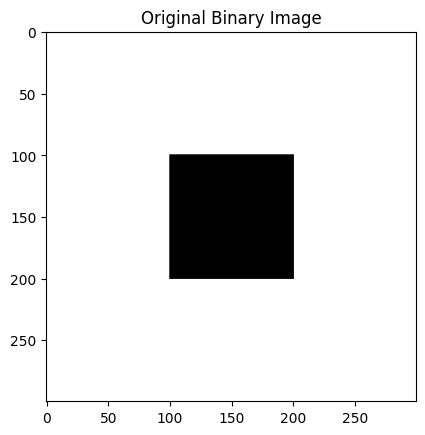

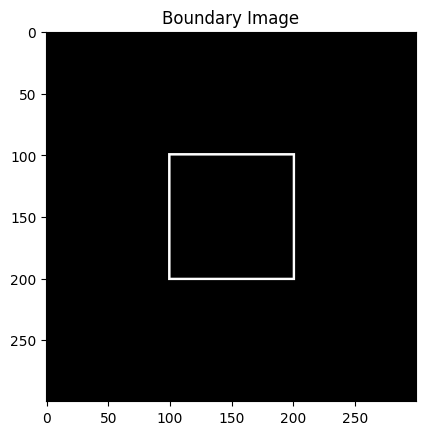

In [38]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def perform_boundary_detection(binary_image, structuring_element):
    # Create a structuring element using numpy array
    kernel = np.array(structuring_element, dtype=np.uint8)


    # Perform erosion
    eroded_image = cv2.erode(binary_image, kernel, iterations=1)

    dilated_image = cv2.dilate(binary_image, kernel, iterations=1)

    # Compute the morphological gradient (difference between dilation and erosion)
    boundary_image = dilated_image-eroded_image

    return boundary_image

# Create a blank white image (255 indicates white)
binary_image = np.ones((300, 300), dtype=np.uint8) * 255

# Create a black rectangle (0 indicates black) in the middle of the image
cv2.rectangle(binary_image, (100, 100), (200, 200), 0, thickness=-1)

# Display the original binary image using matplotlib
plt.imshow(binary_image, cmap='gray')
plt.title('Original Binary Image')
plt.show()

# Define a structuring element (3x3 rectangular kernel)
structuring_element = np.ones((3, 3), dtype=np.uint8)

# Perform boundary detection
boundary_image = perform_boundary_detection(binary_image, structuring_element)

# Display the boundary image using matplotlib
plt.imshow(boundary_image, cmap='gray')
plt.title('Boundary Image')
plt.show()
